# ACA 2: Build a classifier that can predict on or off-task behavior 
## AUTHOR: Honglin Zheng, Christine Gao, Robert Abrams, Mina Choi

# 1. clean data
 ******
### 1.1 build dummy variables for ontask and activity formats   
*ontask: 1 = ontask; 2 = offtask*
### 1.2 delete rows that contain missing data or the total time is 0 

### 1.3 delete variables that we don't consider as predictors
*don't take the hierarchical data structure into account to improve the generalisability and interpretability of our model.*  
### 1.4 standardize three continuous variables     
*obsr/act; transitions/durations; total time*


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("aca2_dataset_training.csv")
df

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [3]:
df.dropna(axis=0, how='any', inplace=True)
df

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [4]:
df['ONTASK'].value_counts()
#there are no rows to drop bc they all have values filled out

Y    14938
N     7246
Name: ONTASK, dtype: int64

In [5]:
dummy = pd.get_dummies(df['ONTASK'], prefix = 'ONTASK')
dummy

,ONTASK_N,ONTASK_Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
22179,0,1
22180,1,0
22181,1,0
22182,0,1


In [6]:
attn = pd.concat([df, dummy], axis=1)
attn = attn.drop(['ONTASK', 'ONTASK_N'], axis=1)
attn

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ONTASK_Y
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,1
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,2,3,2,3,890.333333,0.002545,213,1
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,1
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,5,6,0,1,592.333333,0.001407,3229,1
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,1
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,0
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,0
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,1


Main variables to pay attention to:
IV: ONTASK
DV: GRADE, Gender, NumACTIVITIES, TRANSITIONS, 

In [7]:
col_list = ['GRADE', 'STUDENTID', 'Gender', 'totalobs-forsession', 'Activity', 'TRANSITIONS', 'NumACTIVITIES', 'FORMATchanges', 'NumFORMATS', 'Obsv/act', 'Transitions/Durations', 'Total Time', 'ONTASK_Y']

In [8]:
#dropping irrelevant columns
attn = attn[col_list]
attn

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ONTASK_Y
0,2,965160,1,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,1
1,3,11665,1,225,Individual,2,3,2,3,890.333333,0.002545,213,1
2,0,187441,0,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,1
3,1,402837,0,320,Wholedesks,5,6,0,1,592.333333,0.001407,3229,1
4,2,300647,1,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,1
22180,0,87701,0,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,0
22181,4,130859,0,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,0
22182,0,874565,1,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,1


In [9]:
attn['Activity'].value_counts()

Wholedesks     7144
Wholecarpet    5635
Individual     4548
Smallgroup     4326
Testing         414
Dancing         117
Name: Activity, dtype: int64

In [10]:
attn = attn.rename(columns={'Total Time': 'TotalTime'})
attn

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,TotalTime,ONTASK_Y
0,2,965160,1,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,1
1,3,11665,1,225,Individual,2,3,2,3,890.333333,0.002545,213,1
2,0,187441,0,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,1
3,1,402837,0,320,Wholedesks,5,6,0,1,592.333333,0.001407,3229,1
4,2,300647,1,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,1
22180,0,87701,0,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,0
22181,4,130859,0,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,0
22182,0,874565,1,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,1


In [11]:
attn = attn[attn.TotalTime != 0]
attn

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,TotalTime,ONTASK_Y
0,2,965160,1,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,1
1,3,11665,1,225,Individual,2,3,2,3,890.333333,0.002545,213,1
2,0,187441,0,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,1
3,1,402837,0,320,Wholedesks,5,6,0,1,592.333333,0.001407,3229,1
4,2,300647,1,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,1
22180,0,87701,0,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,0
22181,4,130859,0,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,0
22182,0,874565,1,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,1


In [12]:
actdummy = pd.get_dummies(attn['Activity'], prefix='Act')
actdummy

,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
22179,0,0,0,0,1,0
22180,0,0,1,0,0,0
22181,0,0,1,0,0,0
22182,0,0,0,0,0,1


In [13]:
attn = pd.concat([attn, actdummy], axis=1)
attn

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,TotalTime,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
0,2,965160,1,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,1,0,0,0,0,1,0
1,3,11665,1,225,Individual,2,3,2,3,890.333333,0.002545,213,1,0,1,0,0,0,0
2,0,187441,0,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,1,0,0,1,0,0,0
3,1,402837,0,320,Wholedesks,5,6,0,1,592.333333,0.001407,3229,1,0,0,0,0,0,1
4,2,300647,1,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,1,0,0,0,0,1,0
22180,0,87701,0,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,0,0,0,1,0,0,0
22181,4,130859,0,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,0,0,0,1,0,0,0
22182,0,874565,1,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,1,0,0,0,0,0,1


# 2. descriptive analysis
******
### 2.1 mean, max, min, std...   

### 2.2 correlation matrix   

### 2.3 delete rows with outliers

In [14]:
attn.describe()

,GRADE,STUDENTID,Gender,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,TotalTime,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
count,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000
mean,2.057789,506909.726319,0.506201,171.215710,2.379810,3.379810,1.529690,2.529690,974.671395,0.003057,780.675844,0.673163,0.004998,0.204988,0.195084,0.018809,0.254191,0.321930
std,1.503388,283407.845359,0.499973,105.595493,1.314837,1.314837,1.227974,1.227974,455.127942,0.008237,664.210451,0.469068,0.070518,0.403702,0.396275,0.135852,0.435415,0.467227
min,0.000000,1123.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,387.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,264220.000000,0.000000,83.000000,1.000000,2.000000,1.000000,2.000000,721.200000,0.000839,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,514301.000000,1.000000,166.000000,2.000000,3.000000,1.000000,2.000000,876.250000,0.001513,593.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,743450.000000,1.000000,248.000000,3.000000,4.000000,2.000000,3.000000,1106.750000,0.003261,1127.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,999979.000000,1.000000,511.000000,6.000000,7.000000,5.000000,6.000000,2735.000000,0.666667,3554.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### calculate the mean + 3std for three continuous variables
- obsv/act: 975+455*3 = 2340
- Transitions/Durations: 0.003+0.008*3 = 0.027
- TotalTime: 781+664*3 = 2773

In [15]:
mask = (attn['Transitions/Durations'] < 0.027) & (attn['Obsv/act'] < 2340) & (attn['TotalTime'] < 2773)
attn2 = attn[mask]
attn2

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,TotalTime,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
0,2,965160,1,224,Wholecarpet,1,2,1,2,1390.500000,0.000664,1027,1,0,0,0,0,1,0
1,3,11665,1,225,Individual,2,3,2,3,890.333333,0.002545,213,1,0,1,0,0,0,0
2,0,187441,0,374,Smallgroup,3,4,1,2,770.500000,0.001439,2078,1,0,0,1,0,0,0
4,2,300647,1,35,Wholedesks,2,3,1,2,870.000000,0.005882,260,1,0,0,0,0,0,1
5,2,474608,1,21,Smallgroup,2,3,2,3,778.666667,0.001944,248,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,969.000000,0.002959,652,1,0,0,0,0,1,0
22180,0,87701,0,211,Smallgroup,3,4,1,2,770.500000,0.001439,708,0,0,0,1,0,0,0
22181,4,130859,0,95,Smallgroup,1,2,0,1,1060.000000,0.000472,362,0,0,0,1,0,0,0
22182,0,874565,1,147,Wholedesks,1,2,1,2,1204.500000,0.000838,60,1,0,0,0,0,0,1


In [16]:
attn2.describe()

,GRADE,STUDENTID,Gender,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,TotalTime,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
count,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.0,20896.000000,20896.000000
mean,2.057619,505780.349876,0.504211,167.963582,2.425536,3.425536,1.574512,2.574512,927.949659,0.002759,741.805944,0.669937,0.002010,0.215926,0.202335,0.0,0.250383,0.329345
std,1.487744,283594.454865,0.499994,103.506428,1.245507,1.245507,1.194748,1.194748,354.778560,0.003477,605.839496,0.470247,0.044789,0.411473,0.401751,0.0,0.433244,0.469987
min,0.000000,1123.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,387.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,262288.000000,0.000000,81.000000,2.000000,3.000000,1.000000,2.000000,721.200000,0.000850,258.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2.000000,509723.000000,1.000000,162.000000,2.000000,3.000000,1.000000,2.000000,870.000000,0.001540,576.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,4.000000,740404.000000,1.000000,244.000000,3.000000,4.000000,2.000000,3.000000,1102.666667,0.003268,1076.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,4.000000,999979.000000,1.000000,479.000000,6.000000,7.000000,5.000000,6.000000,2181.000000,0.026316,2772.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [17]:
##standardize the data
mean = attn2.iloc[:,10].mean()
std = attn2.iloc[:,10].std()
lst= (attn2.iloc[:,10] - mean) /std
lst
attn2 = attn2.drop(['Obsv/act'], axis=1)
attn2['Zobsvact'] = lst
attn2

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Transitions/Durations,TotalTime,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact
0,2,965160,1,224,Wholecarpet,1,2,1,2,0.000664,1027,1,0,0,0,0,1,0,-0.602617
1,3,11665,1,225,Individual,2,3,2,3,0.002545,213,1,0,1,0,0,0,0,-0.061671
2,0,187441,0,374,Smallgroup,3,4,1,2,0.001439,2078,1,0,0,1,0,0,0,-0.379654
4,2,300647,1,35,Wholedesks,2,3,1,2,0.005882,260,1,0,0,0,0,0,1,0.898254
5,2,474608,1,21,Smallgroup,2,3,2,3,0.001944,248,1,0,0,1,0,0,0,-0.234483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,0.002959,652,1,0,0,0,0,1,0,0.057406
22180,0,87701,0,211,Smallgroup,3,4,1,2,0.001439,708,0,0,0,1,0,0,0,-0.379654
22181,4,130859,0,95,Smallgroup,1,2,0,1,0.000472,362,0,0,0,1,0,0,0,-0.657797
22182,0,874565,1,147,Wholedesks,1,2,1,2,0.000838,60,1,0,0,0,0,0,1,-0.552590


In [18]:
##standardize the data
mean = attn2.iloc[:,11].mean()
std = attn2.iloc[:,11].std()
lst= (attn2.iloc[:,11] - mean) /std
lst
attn2 = attn2.drop(['Transitions/Durations'], axis=1)
attn2['Ztran'] = lst
attn2

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,TotalTime,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact,Ztran
0,2,965160,1,224,Wholecarpet,1,2,1,2,1027,1,0,0,0,0,1,0,-0.602617,0.701893
1,3,11665,1,225,Individual,2,3,2,3,213,1,0,1,0,0,0,0,-0.061671,0.701893
2,0,187441,0,374,Smallgroup,3,4,1,2,2078,1,0,0,1,0,0,0,-0.379654,0.701893
4,2,300647,1,35,Wholedesks,2,3,1,2,260,1,0,0,0,0,0,1,0.898254,0.701893
5,2,474608,1,21,Smallgroup,2,3,2,3,248,1,0,0,1,0,0,0,-0.234483,0.701893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,652,1,0,0,0,0,1,0,0.057406,0.701893
22180,0,87701,0,211,Smallgroup,3,4,1,2,708,0,0,0,1,0,0,0,-0.379654,-1.424649
22181,4,130859,0,95,Smallgroup,1,2,0,1,362,0,0,0,1,0,0,0,-0.657797,-1.424649
22182,0,874565,1,147,Wholedesks,1,2,1,2,60,1,0,0,0,0,0,1,-0.552590,0.701893


In [19]:
##standardize the data
mean = attn2.iloc[:,12].mean()
std = attn2.iloc[:,12].std()
lst= (attn2.iloc[:,12] - mean) /std
lst
attn2 = attn2.drop(['TotalTime'], axis=1)
attn2['Ztt'] = lst
attn2

,GRADE,STUDENTID,Gender,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact,Ztran,Ztt
0,2,965160,1,224,Wholecarpet,1,2,1,2,1,0,0,0,0,1,0,-0.602617,0.701893,-0.524764
1,3,11665,1,225,Individual,2,3,2,3,1,0,1,0,0,0,0,-0.061671,0.701893,1.905527
2,0,187441,0,374,Smallgroup,3,4,1,2,1,0,0,1,0,0,0,-0.379654,0.701893,-0.524764
4,2,300647,1,35,Wholedesks,2,3,1,2,1,0,0,0,0,0,1,0.898254,0.701893,-0.524764
5,2,474608,1,21,Smallgroup,2,3,2,3,1,0,0,1,0,0,0,-0.234483,0.701893,-0.524764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,749212,1,95,Wholecarpet,2,3,2,3,1,0,0,0,0,1,0,0.057406,0.701893,-0.524764
22180,0,87701,0,211,Smallgroup,3,4,1,2,0,0,0,1,0,0,0,-0.379654,-1.424649,-0.524764
22181,4,130859,0,95,Smallgroup,1,2,0,1,0,0,0,1,0,0,0,-0.657797,-1.424649,-0.524764
22182,0,874565,1,147,Wholedesks,1,2,1,2,1,0,0,0,0,0,1,-0.552590,0.701893,-0.524764


In [20]:
attn2.describe()

,GRADE,STUDENTID,Gender,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,ONTASK_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact,Ztran,Ztt
count,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.000000,20896.0,20896.000000,20896.000000,2.089600e+04,2.089600e+04,2.089600e+04
mean,2.057619,505780.349876,0.504211,167.963582,2.425536,3.425536,1.574512,2.574512,0.669937,0.002010,0.215926,0.202335,0.0,0.250383,0.329345,1.803882e-14,-7.211774e-16,-2.910723e-16
std,1.487744,283594.454865,0.499994,103.506428,1.245507,1.245507,1.194748,1.194748,0.470247,0.044789,0.411473,0.401751,0.0,0.433244,0.469987,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,1123.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7.934530e-01,-1.424649e+00,-5.247642e-01
25%,1.000000,262288.000000,0.000000,81.000000,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-5.491112e-01,-1.424649e+00,-5.247642e-01
50%,2.000000,509723.000000,1.000000,162.000000,2.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-3.505524e-01,7.018935e-01,-5.247642e-01
75%,4.000000,740404.000000,1.000000,244.000000,3.000000,4.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.463842e-01,7.018935e-01,-5.247642e-01
max,4.000000,999979.000000,1.000000,479.000000,6.000000,7.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,6.774709e+00,7.018935e-01,1.905527e+00


In [21]:
attn2.groupby('ONTASK_Y').mean()

,GRADE,STUDENTID,Gender,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact,Ztran,Ztt
ONTASK_Y,,,,,,,,,,,,,,,,,
0,2.170509,503868.863854,0.474554,168.092069,2.348992,3.348992,1.550819,2.550819,0.001015,0.226040,0.179063,0.0,0.239669,0.354212,-0.037338,-1.424649,0.02458
1,2.002000,506722.097078,0.518823,167.900279,2.463247,3.463247,1.586185,2.586185,0.002500,0.210944,0.213801,0.0,0.255661,0.317094,0.018396,0.701893,-0.01211


array([[<AxesSubplot:xlabel='Zobsvact', ylabel='Zobsvact'>,
        <AxesSubplot:xlabel='Ztran', ylabel='Zobsvact'>,
        <AxesSubplot:xlabel='Ztt', ylabel='Zobsvact'>],
       [<AxesSubplot:xlabel='Zobsvact', ylabel='Ztran'>,
        <AxesSubplot:xlabel='Ztran', ylabel='Ztran'>,
        <AxesSubplot:xlabel='Ztt', ylabel='Ztran'>],
       [<AxesSubplot:xlabel='Zobsvact', ylabel='Ztt'>,
        <AxesSubplot:xlabel='Ztran', ylabel='Ztt'>,
        <AxesSubplot:xlabel='Ztt', ylabel='Ztt'>]], dtype=object)

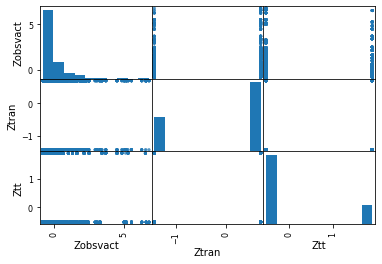

In [22]:
pd.plotting.scatter_matrix(attn2.iloc[:,16:])

### result: no colinearity; not normal distribution

# 3. build logistic regression model
******
### 3.1 explain why we choose this model  

### 3.2 build the model   

### 3.3 explain the results
******

### 3.1 we choose logistic regression model for the following three reasons:
- better interpretability: by showing a list of coefficients, LR gives the information of the influence of particular input fields on the objective.
- clear and short analysis outcome: Decision Tree may grow to be very complex while training complex datasets.
- handle collinearity reasonably well: Naive Bayes assumes all the features to be conditionally independent.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
Xs = attn2[["Gender", "NumACTIVITIES", "NumFORMATS", "Act_Dancing", "Act_Individual", "Act_Smallgroup", "Act_Testing", "Act_Wholecarpet", "Act_Wholedesks", "Zobsvact", "Ztran", "Ztt"]].to_numpy()
ontask = attn2.loc[:,"ONTASK_Y"].values.reshape(-1, 1)

In [25]:
LogitModel1 = LogisticRegression()
LogitModel1.fit(Xs, ontask)

/Users/zhenghonglin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [26]:
LogitModel1.intercept_

array([2.95080049])

In [27]:
LogitModel1.coef_

array([[ 5.76803557e-02,  3.83663829e-02, -2.02392522e-02,
         3.87351305e-03, -4.80399918e-03,  4.08953484e-02,
         0.00000000e+00,  1.11802102e-02, -5.09233151e-02,
         1.58414499e-02,  7.46153440e+00, -1.17914856e-02]])

In [28]:
LogitModel1.coef_>0.3

array([[False, False, False, False, False, False, False, False, False,
        False,  True, False]])

In [29]:
LogitModel1.coef_< -0.3

array([[False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [52]:
from sklearn.tree import DecisionTreeClassifier

Xs_tree = attn2.drop(['ONTASK_Y', 'GRADE', 'STUDENTID' , 'totalobs-forsession', 'TRANSITIONS', 'FORMATchanges', 'Activity'], axis = 1)
Y_tree = attn2['ONTASK_Y']

In [53]:
TreeModel = DecisionTreeClassifier()
TreeModel.fit(Xs_tree, Y_tree)

DecisionTreeClassifier()

In [54]:
from sklearn import tree
text_representation = tree.export_text(TreeModel)
print(text_representation)

|--- feature_10 <= -0.36
|   |--- class: 0
|--- feature_10 >  -0.36
|   |--- class: 1



### 3.3 Result: Transition/Durations plays the most important role in predicting ontask behaviors. More times of transition per session, more ontask behaviors.

# 4. model evaluation
******
### 4.1 import validation data file 

### 4.2 predict Ys   

### 4.3 compare Ys

### 4.4 report accuracy

In [30]:
testdata = pd.read_csv("aca2_dataset_validation.csv")
testdata

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,Y,1,2,1,2,1677.00,0.000446,0
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,Y,3,4,3,4,826.00,0.003672,0
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,Y,3,4,2,3,862.75,0.004658,0
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,N,2,3,0,1,1073.00,0.000621,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,Y,3,4,2,3,1106.75,0.002841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,Y,0,1,0,1,2530.00,0.000000,2367
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,Y,0,1,0,1,2530.00,0.000000,2375
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,N,0,1,0,1,2530.00,0.000000,2389
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,Y,0,1,0,1,2530.00,0.000000,2522


In [31]:
testdata.dropna(axis=0, how='any', inplace=True)
testdata

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,Y,1,2,1,2,1677.00,0.000446,0
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,Y,3,4,3,4,826.00,0.003672,0
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,Y,3,4,2,3,862.75,0.004658,0
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,N,2,3,0,1,1073.00,0.000621,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,Y,3,4,2,3,1106.75,0.002841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,Y,0,1,0,1,2530.00,0.000000,2367
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,Y,0,1,0,1,2530.00,0.000000,2375
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,N,0,1,0,1,2530.00,0.000000,2389
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,Y,0,1,0,1,2530.00,0.000000,2522


In [32]:
testdata2 = pd.get_dummies(testdata, prefix='ontask', columns=['ONTASK'])
testdata2

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ontask_N,ontask_Y
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,1,2,1,2,1677.00,0.000446,0,0,1
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,3,4,3,4,826.00,0.003672,0,0,1
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,3,4,2,3,862.75,0.004658,0,0,1
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,2,3,0,1,1073.00,0.000621,0,1,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,3,4,2,3,1106.75,0.002841,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,0,1,0,1,2530.00,0.000000,2367,0,1
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,0,1,0,1,2530.00,0.000000,2375,0,1
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,0,1,0,1,2530.00,0.000000,2389,1,0
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,0,1,0,1,2530.00,0.000000,2522,0,1


In [33]:
testdata3 = pd.get_dummies(testdata2['Activity'], prefix='Act')
testdata3

,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
5542,0,0,0,1,0,0
5543,0,0,0,1,0,0
5544,0,0,0,1,0,0
5545,0,0,0,1,0,0


In [34]:
testdata4 = pd.concat([testdata2, testdata3], axis=1)
testdata4

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,...,Transitions/Durations,Total Time,ontask_N,ontask_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,...,0.000446,0,0,1,0,0,0,0,1,0
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,...,0.003672,0,0,1,0,0,0,0,0,1
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,...,0.004658,0,0,1,0,0,0,0,1,0
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,...,0.000621,0,1,0,0,0,0,0,1,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,...,0.002841,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,...,0.000000,2367,0,1,0,0,0,1,0,0
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,...,0.000000,2375,0,1,0,0,0,1,0,0
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,...,0.000000,2389,1,0,0,0,0,1,0,0
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,...,0.000000,2522,0,1,0,0,0,1,0,0


In [35]:
testdata4 = testdata4.rename(columns={'Total Time': 'TotalTime'})
testdata4 = testdata4[testdata4.TotalTime != 0]
testdata4

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,...,Transitions/Durations,TotalTime,ontask_N,ontask_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
16,19149,A,T8S,1,Z,720803,0,1,1,Wholedesks,...,0.001407,2,0,1,0,0,0,0,0,1
17,20775,A,T8VQ,4,Z,123182,1,1,1,Wholecarpet,...,0.000446,3,0,1,0,0,0,0,1,0
18,15882,B,T9T,2,Z,268780,1,1,1,Wholecarpet,...,0.009381,3,1,0,0,0,0,0,1,0
19,28898,C,T0U,3,Z,667334,0,1,1,Individual,...,0.011461,3,0,1,0,1,0,0,0,0
20,39567,E,T6T,2,Z,939145,0,1,1,Individual,...,0.000879,4,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,...,0.000000,2367,0,1,0,0,0,1,0,0
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,...,0.000000,2375,0,1,0,0,0,1,0,0
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,...,0.000000,2389,1,0,0,0,0,1,0,0
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,...,0.000000,2522,0,1,0,0,0,1,0,0


In [36]:
testdata2.describe()

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,ontask_N,ontask_Y
count,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000,5547.000000
mean,28298.759690,2.077519,502004.374977,0.502434,9.582116,170.296016,2.376961,3.376961,1.538850,2.538850,981.337431,0.003268,766.682531,0.333333,0.666667
std,7906.825633,1.494350,283930.309985,0.500039,5.697023,105.731726,1.315308,1.315308,1.240934,1.240934,458.075569,0.010362,664.227651,0.471447,0.471447
min,14413.000000,0.000000,1123.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,387.000000,0.000000,0.000000,0.000000,0.000000
25%,21589.000000,1.000000,254364.000000,0.000000,5.000000,81.500000,1.000000,2.000000,1.000000,2.000000,721.200000,0.000839,248.000000,0.000000,0.000000
50%,28270.000000,2.000000,509723.000000,1.000000,9.000000,162.000000,2.000000,3.000000,1.000000,2.000000,882.500000,0.001521,584.000000,0.000000,1.000000
75%,35064.500000,4.000000,739098.500000,1.000000,14.000000,248.000000,3.000000,4.000000,2.000000,3.000000,1110.500000,0.003241,1093.500000,1.000000,1.000000
max,42129.000000,4.000000,999979.000000,1.000000,32.000000,510.000000,6.000000,7.000000,5.000000,6.000000,2735.000000,0.600000,3503.000000,1.000000,1.000000


In [37]:
## delete the outliers
mask = (testdata4['Obsv/act'] < 2355) & (testdata4['Transitions/Durations'] < 0.033) & (testdata4['TotalTime'] < 2758)
testdata5 = testdata4[mask]
testdata5

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,...,Transitions/Durations,TotalTime,ontask_N,ontask_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks
16,19149,A,T8S,1,Z,720803,0,1,1,Wholedesks,...,0.001407,2,0,1,0,0,0,0,0,1
17,20775,A,T8VQ,4,Z,123182,1,1,1,Wholecarpet,...,0.000446,3,0,1,0,0,0,0,1,0
18,15882,B,T9T,2,Z,268780,1,1,1,Wholecarpet,...,0.009381,3,1,0,0,0,0,0,1,0
19,28898,C,T0U,3,Z,667334,0,1,1,Individual,...,0.011461,3,0,1,0,1,0,0,0,0
20,39567,E,T6T,2,Z,939145,0,1,1,Individual,...,0.000879,4,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,19129,A,T8S,1,Z,269993,0,24,461,Wholedesks,...,0.001785,1600,1,0,0,0,0,0,0,1
5531,19133,A,T8S,1,Z,83939,1,24,465,Wholedesks,...,0.001785,1609,0,1,0,0,0,0,0,1
5534,19137,A,T8S,1,Z,15887,0,24,469,Wholedesks,...,0.001785,1638,0,1,0,0,0,0,0,1
5536,19140,A,T8S,1,Z,224646,0,24,472,Wholedesks,...,0.001785,1653,0,1,0,0,0,0,0,1


In [38]:
##standardize the data
mean = testdata5.iloc[:,14].mean()
std = testdata5.iloc[:,14].std()
lst= (testdata5.iloc[:,14] - mean) /std
lst
testdata5 = testdata5.drop(['Obsv/act'], axis=1)
testdata5['Zobsvact'] = lst
testdata5

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,...,TotalTime,ontask_N,ontask_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact
16,19149,A,T8S,1,Z,720803,0,1,1,Wholedesks,...,2,0,1,0,0,0,0,0,1,-0.957450
17,20775,A,T8VQ,4,Z,123182,1,1,1,Wholecarpet,...,3,0,1,0,0,0,0,1,0,2.101698
18,15882,B,T9T,2,Z,268780,1,1,1,Wholecarpet,...,3,1,0,0,0,0,0,1,0,-1.330678
19,28898,C,T0U,3,Z,667334,0,1,1,Individual,...,3,0,1,0,1,0,0,0,0,-1.329550
20,39567,E,T6T,2,Z,939145,0,1,1,Individual,...,4,0,1,0,1,0,0,0,0,0.602678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,19129,A,T8S,1,Z,269993,0,24,461,Wholedesks,...,1600,1,0,0,0,0,0,0,1,0.493389
5531,19133,A,T8S,1,Z,83939,1,24,465,Wholedesks,...,1609,0,1,0,0,0,0,0,1,0.493389
5534,19137,A,T8S,1,Z,15887,0,24,469,Wholedesks,...,1638,0,1,0,0,0,0,0,1,0.493389
5536,19140,A,T8S,1,Z,224646,0,24,472,Wholedesks,...,1653,0,1,0,0,0,0,0,1,0.493389


In [39]:
##standardize the data
mean = testdata5.iloc[:,15].mean()
std = testdata5.iloc[:,15].std()
lst= (testdata5.iloc[:,15] - mean) /std
lst
testdata5 = testdata5.drop(['Transitions/Durations'], axis=1)
testdata5['Ztran'] = lst
testdata5

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,...,ontask_N,ontask_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact,Ztran
16,19149,A,T8S,1,Z,720803,0,1,1,Wholedesks,...,0,1,0,0,0,0,0,1,-0.957450,-1.206743
17,20775,A,T8VQ,4,Z,123182,1,1,1,Wholecarpet,...,0,1,0,0,0,0,1,0,2.101698,-1.205090
18,15882,B,T9T,2,Z,268780,1,1,1,Wholecarpet,...,1,0,0,0,0,0,1,0,-1.330678,-1.205090
19,28898,C,T0U,3,Z,667334,0,1,1,Individual,...,0,1,0,1,0,0,0,0,-1.329550,-1.205090
20,39567,E,T6T,2,Z,939145,0,1,1,Individual,...,0,1,0,1,0,0,0,0,0.602678,-1.203436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,19129,A,T8S,1,Z,269993,0,24,461,Wholedesks,...,1,0,0,0,0,0,0,1,0.493389,1.435085
5531,19133,A,T8S,1,Z,83939,1,24,465,Wholedesks,...,0,1,0,0,0,0,0,1,0.493389,1.449964
5534,19137,A,T8S,1,Z,15887,0,24,469,Wholedesks,...,0,1,0,0,0,0,0,1,0.493389,1.497907
5536,19140,A,T8S,1,Z,224646,0,24,472,Wholedesks,...,0,1,0,0,0,0,0,1,0.493389,1.522705


In [40]:
##standardize the data
mean = testdata5.iloc[:,16].mean()
std = testdata5.iloc[:,16].std()
lst= (testdata5.iloc[:,16] - mean) /std
lst
testdata5 = testdata5.drop(['TotalTime'], axis=1)
testdata5['Ztt'] = lst
testdata5

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,...,ontask_Y,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact,Ztran,Ztt
16,19149,A,T8S,1,Z,720803,0,1,1,Wholedesks,...,1,0,0,0,0,0,1,-0.957450,-1.206743,0.711605
17,20775,A,T8VQ,4,Z,123182,1,1,1,Wholecarpet,...,1,0,0,0,0,1,0,2.101698,-1.205090,0.711605
18,15882,B,T9T,2,Z,268780,1,1,1,Wholecarpet,...,0,0,0,0,0,1,0,-1.330678,-1.205090,-1.405005
19,28898,C,T0U,3,Z,667334,0,1,1,Individual,...,1,0,1,0,0,0,0,-1.329550,-1.205090,0.711605
20,39567,E,T6T,2,Z,939145,0,1,1,Individual,...,1,0,1,0,0,0,0,0.602678,-1.203436,0.711605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,19129,A,T8S,1,Z,269993,0,24,461,Wholedesks,...,0,0,0,0,0,0,1,0.493389,1.435085,-1.405005
5531,19133,A,T8S,1,Z,83939,1,24,465,Wholedesks,...,1,0,0,0,0,0,1,0.493389,1.449964,0.711605
5534,19137,A,T8S,1,Z,15887,0,24,469,Wholedesks,...,1,0,0,0,0,0,1,0.493389,1.497907,0.711605
5536,19140,A,T8S,1,Z,224646,0,24,472,Wholedesks,...,1,0,0,0,0,0,1,0.493389,1.522705,0.711605


In [63]:
Xs_test = testdata5[["Gender", "NumACTIVITIES", "NumFORMATS", "Act_Dancing", "Act_Individual", "Act_Smallgroup", "Act_Testing", "Act_Wholecarpet", "Act_Wholedesks", "Zobsvact", "Ztran", "Ztt"]].to_numpy()
Ontask_test = testdata5.loc[:,"ontask_Y"].values.reshape(-1, 1)


In [64]:
from sklearn.tree import DecisionTreeClassifier

Xs_tree_test = testdata5.drop(['ontask_Y','UNIQUEID', 'Class', 'ontask_N','SCHOOL', 'CODER', 'OBSNUM', 'GRADE', 'STUDENTID' , 'totalobs-forsession', 'TRANSITIONS', 'FORMATchanges', 'Activity'], axis = 1)
Y_tree_test = testdata5['ontask_Y']
Xs_tree_test

,Gender,NumACTIVITIES,NumFORMATS,Act_Dancing,Act_Individual,Act_Smallgroup,Act_Testing,Act_Wholecarpet,Act_Wholedesks,Zobsvact,Ztran,Ztt
16,0,6,1,0,0,0,0,0,1,-0.957450,-1.206743,0.711605
17,1,2,2,0,0,0,0,1,0,2.101698,-1.205090,0.711605
18,1,6,5,0,0,0,0,1,0,-1.330678,-1.205090,-1.405005
19,0,5,5,0,1,0,0,0,0,-1.329550,-1.205090,0.711605
20,0,2,2,0,1,0,0,0,0,0.602678,-1.203436,0.711605
...,...,...,...,...,...,...,...,...,...,...,...,...
5530,0,4,3,0,0,0,0,0,1,0.493389,1.435085,-1.405005
5531,1,4,3,0,0,0,0,0,1,0.493389,1.449964,0.711605
5534,0,4,3,0,0,0,0,0,1,0.493389,1.497907,0.711605
5536,0,4,3,0,0,0,0,0,1,0.493389,1.522705,0.711605


In [65]:
pred_tree = TreeModel.predict(Xs_tree_test)

In [42]:
Ontask_pred = LogitModel1.predict(Xs_test)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
print(confusion_matrix(Ontask_test, Ontask_pred))

[[ 763  996]
 [1510 1963]]


In [66]:
print(confusion_matrix(Ontask_test, pred_tree))

[[ 796  963]
 [1594 1879]]


In [45]:
from sklearn.metrics import accuracy_score
logit = accuracy_score(Ontask_test, Ontask_pred)

In [69]:
ac_tree = accuracy_score(Ontask_test, pred_tree)

In [46]:
print("The accuracy for logistic regression in sklearn is", logit*100, "%")

The accuracy for logistic regression in sklearn is 52.10244648318043 %


In [70]:
print("The accuracy for decision tree", ac_tree*100, "%")

The accuracy for decision tree 51.12767584097859 %


## This model has an accuracy of 52%.

### Contribution
- discussion: Robert, Christine, Honglin, Mina
- taking notes and write emails: Christine
- cleaning data: Christine
- descriptive analysis: Mina, Robert
- model: Honglin
- interpretating the result: Honglin

In [47]:
import os

os.system('jupyter nbconvert --to html ACA2.ipynb')

0